<h1>Lottery with Scikit-Learn</h1>

<p>import data</p>

In [30]:
"""import requests

url= 'http://www.mbnet.com.pl/dl.xls'

r = requests.get(url, allow_redirects=True)

rawFile = open('datasets\dl.xls', 'wb')
rawFile.write(r.content)
rawFile.close()"""

"import requests\n\nurl= 'http://www.mbnet.com.pl/dl.xls'\n\nr = requests.get(url, allow_redirects=True)\n\nrawFile = open('datasets\\dl.xls', 'wb')\nrawFile.write(r.content)\nrawFile.close()"

<p>check file</p>

In [31]:
import pandas as pd 

df = pd.read_excel('datasets\dl.xls', index_col=None, header=None)
print(df.head())

     0           1   2   3   4   5   6   7
0  1.0  27.01.1957   8  12  31  39  43  45
1  2.0  03.02.1957   5  10  11  22  25  27
2  3.0  10.02.1957  18  19  20  26  45  49
3  4.0  17.02.1957   2  11  14  37  40  45
4  5.0  24.02.1957   8  10  15  35  39  49


<p>headers need to be added</p>

In [32]:
df.columns = ["number", "date", "ball-1", "ball-2","ball-3", "ball-4", "ball-5", "ball-6"]
print(df.tail())

      number         date  ball-1  ball-2  ball-3  ball-4  ball-5  ball-6
6564  6565.0   04.05.2021      10      11      24      27      31      37
6565  6566.0   06.05.2021       3      16      24      42      46      49
6566  6567.0   08.05.2021       8      10      13      36      44      47
6567  6568.0   11.05.2021      19      22      29      31      34      42
6568  6569.0  `13.05.2021       2       3       6      13      15      17


<p>join all "ball" columns to check if there were duplicates before</p>

In [33]:
source_col_loc = df.columns.get_loc('date') # column position starts from 0

df['ColumnA'] = df.iloc[:,source_col_loc+1:source_col_loc+7].apply(
    lambda x: ",".join(x.astype(str)), axis=1)

print(df['ColumnA'].head())

0     8,12,31,39,43,45
1     5,10,11,22,25,27
2    18,19,20,26,45,49
3     2,11,14,37,40,45
4     8,10,15,35,39,49
Name: ColumnA, dtype: object
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
6564    NaN
6565    NaN
6566    NaN
6567    NaN
6568    NaN
Name: ColumnA, Length: 6569, dtype: object


In [34]:
dfs = df.groupby('ColumnA')['ColumnA'].unique()
print("check if there are unique values")
print (pd.DataFrame.from_records(dfs.values.tolist()).stack().value_counts())



check if there are unique values
1,14,28,34,41,43     1
2,3,7,9,13,46        1
21,23,26,28,30,37    1
7,8,24,36,47,48      1
7,14,27,36,40,48     1
                    ..
2,3,14,21,35,43      1
8,15,17,24,28,47     1
24,26,33,36,37,46    1
13,14,27,30,31,35    1
3,13,18,21,23,38     1
Length: 6569, dtype: int64


<p>Let's see how often balls appear </p>

<ipython-input-35-4b5e71597bf6>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-35-4b5e71597bf6>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-35-4b5e71597bf6>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


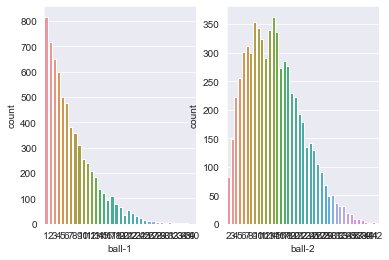

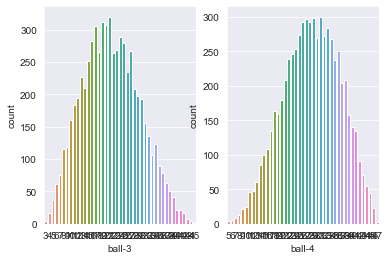

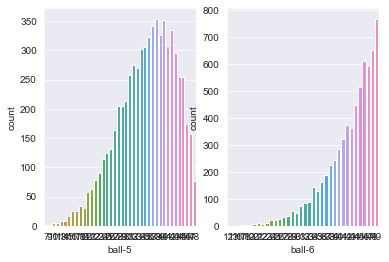

In [35]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_style(style="darkgrid")

fig, ax =plt.subplots(1,2)
sns.countplot(x="ball-1", ax=ax[0], data=df)
sns.countplot(x="ball-2", ax=ax[1], data=df)
fig.show()
fig, ax =plt.subplots(1,2)
sns.countplot(x="ball-3", ax=ax[0], data=df)
sns.countplot(x="ball-4", ax=ax[1], data=df)
fig.show()
fig, ax =plt.subplots(1,2)
sns.countplot(x="ball-5", ax=ax[0], data=df)
sns.countplot(x="ball-6", ax=ax[1], data=df)
fig.show()

ball nr 1 never was a last, ball nr 49 never was first. It looks like, lottery is not that 100% random

<p>Let's make small test for first ball</p>

In [36]:
    import numpy as np
    from sklearn.linear_model import LinearRegression, BayesianRidge
    from sklearn.ensemble import RandomForestRegressor
    
    df1 = df.loc[(df['ball-1'] == 6) & (df['ball-2'] == 9)]
    X_dates = df.iloc[:, 0].values.reshape(-1,1)
    y_ball1_numbers = df.iloc[:, 3].values.reshape(-1,1)

    to_predict_x = [6568.]

    to_predict_x = np.array(to_predict_x).reshape(-1,1)

    print(to_predict_x)

    regsr=RandomForestRegressor(n_estimators = 10, random_state = 0)
    #regsr = LinearRegression() # worth check it
    regsr.fit(X_dates,y_ball1_numbers)

    predicted_y= regsr.predict(to_predict_x)
    print ("Predicted: ", predicted_y)

[[6568.]]
<ipython-input-36-4e8858ce3981>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regsr.fit(X_dates,y_ball1_numbers)
Predicted:  [19.]


<p>the whole logic of predicting next balls is in separate file model.py </p>

In [37]:
import model
to_predict_x = [6570] # type next column number


to_predict_ball1 = model.predict_ball1(dt = df, next_count= to_predict_x)
predicted_ball1 = int(to_predict_ball1(0))

to_predict_ball2 = model.predict_ball2(dt = df, next_count= to_predict_x, ball1= predicted_ball1)
predicted_ball2 = int(to_predict_ball2(0))

to_predict_ball3 = model.predict_ball3(dt = df, next_count= to_predict_x, ball1 = predicted_ball1, ball2= predicted_ball2)
predicted_ball3 = int(to_predict_ball3(0))

to_predict_ball4 = model.predict_ball4(dt = df, next_count= to_predict_x, ball1 = predicted_ball1, ball2= predicted_ball2, ball3 = predicted_ball3)
predicted_ball4 = int(to_predict_ball4(0))

to_predict_ball5 = model.predict_ball5(dt = df, next_count= to_predict_x, ball1 = predicted_ball1, ball2= predicted_ball2, ball3 = predicted_ball3, ball4 = predicted_ball4)
predicted_ball5 = int(to_predict_ball5(0))

to_predict_ball6 = model.predict_ball6(dt = df, next_count= to_predict_x, ball1 = predicted_ball1, ball2= predicted_ball2, ball3 = predicted_ball3, ball4 = predicted_ball4, ball5 = predicted_ball5)
predicted_ball6 = int(to_predict_ball6(0))


print(predicted_ball1, predicted_ball2, predicted_ball3, predicted_ball4, predicted_ball5, predicted_ball6)

4 14 20 24 29 45


In [38]:
general_ball1 = model.predict_general(dt = df,  next_count= to_predict_x, ball_col = 2)
general_ball2 = model.predict_general(dt = df,  next_count= to_predict_x, ball_col = 3)
general_ball3 = model.predict_general(dt = df,  next_count= to_predict_x, ball_col = 4)
general_ball4 = model.predict_general(dt = df,  next_count= to_predict_x, ball_col = 5)
general_ball5 = model.predict_general(dt = df,  next_count= to_predict_x, ball_col = 6)
general_ball6 = model.predict_general(dt = df,  next_count= to_predict_x, ball_col = 7)

print (int(general_ball1(0)), int(general_ball2(0)), int(general_ball3(0)), int(general_ball4(0)), int(general_ball5(0)), int(general_ball6(0)))

c:\Users\Mateusz\Documents\2021\Projekty\Lotto with Machine Learning\model.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regsr.fit(X_dates,y_ball1_numbers)
c:\Users\Mateusz\Documents\2021\Projekty\Lotto with Machine Learning\model.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regsr.fit(X_dates,y_ball1_numbers)
c:\Users\Mateusz\Documents\2021\Projekty\Lotto with Machine Learning\model.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regsr.fit(X_dates,y_ball1_numbers)
c:\Users\Mateusz\Documents\2021\Projekty\Lotto with Machine Learning\model.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

In [39]:
df1000 = df.tail(1000)

general_ball1_1000 = model.predict_general(dt = df1000,  next_count= to_predict_x, ball_col = 2)
general_ball2_1000 = model.predict_general(dt = df1000,  next_count= to_predict_x, ball_col = 3)
general_ball3_1000 = model.predict_general(dt = df1000,  next_count= to_predict_x, ball_col = 4)
general_ball4_1000 = model.predict_general(dt = df1000,  next_count= to_predict_x, ball_col = 5)
general_ball5_1000 = model.predict_general(dt = df1000,  next_count= to_predict_x, ball_col = 6)
general_ball6_1000 = model.predict_general(dt = df1000,  next_count= to_predict_x, ball_col = 7)

print (int(general_ball1_1000(0)), int(general_ball2_1000(0)), int(general_ball3_1000(0)), int(general_ball4_1000(0)), int(general_ball5_1000(0)), int(general_ball6_1000(0)))

c:\Users\Mateusz\Documents\2021\Projekty\Lotto with Machine Learning\model.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regsr.fit(X_dates,y_ball1_numbers)
c:\Users\Mateusz\Documents\2021\Projekty\Lotto with Machine Learning\model.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regsr.fit(X_dates,y_ball1_numbers)
c:\Users\Mateusz\Documents\2021\Projekty\Lotto with Machine Learning\model.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regsr.fit(X_dates,y_ball1_numbers)
c:\Users\Mateusz\Documents\2021\Projekty\Lotto with Machine Learning\model.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

In [40]:
df100 = df.tail(100)

general_ball1_100 = model.predict_general(dt = df100,  next_count= to_predict_x, ball_col = 2)
general_ball2_100 = model.predict_general(dt = df100,  next_count= to_predict_x, ball_col = 3)
general_ball3_100 = model.predict_general(dt = df100,  next_count= to_predict_x, ball_col = 4)
general_ball4_100 = model.predict_general(dt = df100,  next_count= to_predict_x, ball_col = 5)
general_ball5_100 = model.predict_general(dt = df100,  next_count= to_predict_x, ball_col = 6)
general_ball6_100 = model.predict_general(dt = df100,  next_count= to_predict_x, ball_col = 7)

print (int(general_ball1_100(0)), int(general_ball2_100(0)), int(general_ball3_100(0)), int(general_ball4_100(0)), int(general_ball5_100(0)), int(general_ball6_100(0)))

c:\Users\Mateusz\Documents\2021\Projekty\Lotto with Machine Learning\model.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regsr.fit(X_dates,y_ball1_numbers)
c:\Users\Mateusz\Documents\2021\Projekty\Lotto with Machine Learning\model.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regsr.fit(X_dates,y_ball1_numbers)
c:\Users\Mateusz\Documents\2021\Projekty\Lotto with Machine Learning\model.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regsr.fit(X_dates,y_ball1_numbers)
c:\Users\Mateusz\Documents\2021\Projekty\Lotto with Machine Learning\model.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

In [41]:
df10 = df.tail(10)

general_ball1_10 = model.predict_general(dt = df10,  next_count= to_predict_x, ball_col = 2)
general_ball2_10 = model.predict_general(dt = df10,  next_count= to_predict_x, ball_col = 3)
general_ball3_10 = model.predict_general(dt = df10,  next_count= to_predict_x, ball_col = 4)
general_ball4_10 = model.predict_general(dt = df10,  next_count= to_predict_x, ball_col = 5)
general_ball5_10 = model.predict_general(dt = df10,  next_count= to_predict_x, ball_col = 6)
general_ball6_10 = model.predict_general(dt = df10,  next_count= to_predict_x, ball_col = 7)

print (int(general_ball1_10(0)), int(general_ball2_10(0)), int(general_ball3_10(0)), int(general_ball4_10(0)), int(general_ball5_10(0)), int(general_ball6_10(0)))

c:\Users\Mateusz\Documents\2021\Projekty\Lotto with Machine Learning\model.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regsr.fit(X_dates,y_ball1_numbers)
c:\Users\Mateusz\Documents\2021\Projekty\Lotto with Machine Learning\model.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regsr.fit(X_dates,y_ball1_numbers)
c:\Users\Mateusz\Documents\2021\Projekty\Lotto with Machine Learning\model.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regsr.fit(X_dates,y_ball1_numbers)
c:\Users\Mateusz\Documents\2021\Projekty\Lotto with Machine Learning\model.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

<p>good luck!</p>